In [2]:
# IMPORTS

import pandas as pd
import numpy as np
import os


## Acquire

Data is collected from Data.World Wine Quality Dataset

In [3]:
# acquiring the red wine csv
df_red = pd.read_csv("winequality-red.csv")

In [4]:
# acquiring the white wine csv
df_white = pd.read_csv("winequality-white.csv")

In [5]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Prepare

* The red and white csv's should be combined into a single column thats states if the wine is red or white
* Column data types are appropriate
* Missing values are investigated and handled
* Outliers are investigated and handled

In [7]:
# need to add column to both df's that distinguish between red and white wine
df_red['color_type'] = 'red'

In [8]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df_white['color_type'] = 'white'

In [10]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [11]:
df_white.shape

(4898, 13)

In [12]:
df_red.shape

(1599, 13)

In [13]:
df_merged = df_red.merge(df_white, how='outer')

In [14]:
df_merged.shape

(6497, 13)

In [15]:
df_merged.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


In [18]:
df_merged.columns = df_merged.columns.str.replace(' ', '_')

In [19]:
df_merged.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


In [20]:
df_merged.shape

(6497, 13)

In [39]:
import matplotlib.pyplot as plt
import pandas as pd


def check_columns(df, reports=False, graphs=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, the proportion of null values,
    the data type of the column, and the range of the column if it is float or int. The resulting dataframe is sorted by the
    'Number of Unique Values' column in ascending order.

    Args:
    - df: pandas dataframe

    Returns:
    - pandas dataframe
    """
    print(f"Total rows: {df.shape[0]}")
    print(f"Total columns: {df.shape[1]}")
    if reports == True:
        describe = df.describe().round(2)
        pd.DataFrame(describe)
        print(describe)
    if graphs == True:
        df.hist(bins=20, figsize=(10, 10))
        plt.show()
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, proportion of null values, and data type to the data list
        if df[column].dtype in ["float64", "int64"]:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    df[column].describe()[["min", "max", "mean"]].values,
                ]
            )
        else:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    None,
                ]
            )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', 'Proportion of Null Values', 'dtype', and 'Range' (if column is float or int)
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [40]:
check_columns(df_merged)

Total rows: 6497
Total columns: 13


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,106,0,0.0,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...","[3.8, 15.9, 7.215307064799138]"
1,volatile_acidity,float64,187,0,0.0,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...","[0.08, 1.58, 0.3396659996921656]"
2,citric_acid,float64,89,0,0.0,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...","[0.0, 1.66, 0.3186332153301524]"
3,residual_sugar,float64,316,0,0.0,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...","[0.6, 65.8, 5.443235339387409]"
4,chlorides,float64,214,0,0.0,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...","[0.009, 0.611, 0.05603386178236109]"
5,free_sulfur_dioxide,float64,135,0,0.0,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...","[1.0, 289.0, 30.525319378174544]"
6,total_sulfur_dioxide,float64,276,0,0.0,"[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....","[6.0, 440.0, 115.7445744189626]"
7,density,float64,998,0,0.0,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...","[0.98711, 1.03898, 0.9946966338309989]"
8,pH,float64,108,0,0.0,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...","[2.72, 4.01, 3.2185008465445586]"
9,sulphates,float64,111,0,0.0,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...","[0.22, 2.0, 0.5312682776666153]"


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
def get_fences(df, col, k=1.5) -> tuple:
    '''
    get fences will calculate the upper and lower fence
    based on the inner quartile range of a single Series
    
    return: lower_bound and upper_bound, two floats
    '''
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    upper_bound = q3 + (k * iqr)
    lower_bound = q1 - (k * iqr)
    return lower_bound, upper_bound

def report_outliers(df, k=1.5) -> None:
    '''
    report_outliers will print a subset of each continuous
    series in a dataframe (based on numeric quality and n>20)
    and will print out results of this analysis with the fences
    in places
    '''
    num_df = df.select_dtypes('number')
    for col in num_df:
        if len(num_df[col].value_counts()) > 20:
            lower_bound, upper_bound = get_fences(df,col, k=k)
            print(f'Outliers for Col {col}:')
            print('lower: ', lower_bound, 'upper: ', upper_bound)
            print(df[col][(
                df[col] > upper_bound) | (df[col] < lower_bound)])
            
            print('----------')

In [33]:
report_outliers(df_merged)

Outliers for Col fixed_acidity:
lower:  4.450000000000001 upper:  9.65
4       11.2
56      10.2
74       9.7
114     10.1
197     11.5
        ... 
5858     3.8
6045     4.4
6387     4.4
6388     3.9
6446     4.4
Name: fixed_acidity, Length: 357, dtype: float64
----------
Outliers for Col volatile_acidity:
lower:  -0.024999999999999994 upper:  0.655
0       0.700
1       0.700
2       0.880
3       0.760
5       0.660
        ...  
6249    0.695
6300    0.690
6301    0.690
6391    0.785
6416    0.760
Name: volatile_acidity, Length: 377, dtype: float64
----------
Outliers for Col citric_acid:
lower:  0.03999999999999998 upper:  0.6000000000000001
0       0.00
1       0.00
2       0.00
5       0.00
7       0.00
        ... 
6391    0.00
6407    0.67
6416    0.01
6476    0.00
6477    0.02
Name: citric_acid, Length: 509, dtype: float64
----------
Outliers for Col residual_sugar:
lower:  -7.6499999999999995 upper:  17.549999999999997
1599    20.70
1600    20.70
1613    19.25
1637    17.95


(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

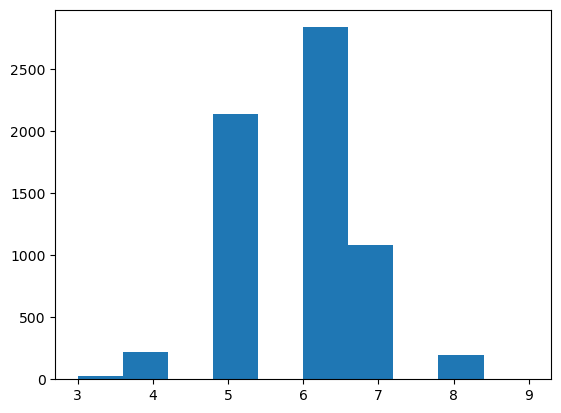

In [27]:
# quality is our target variable
plt.hist(df_merged['quality'])

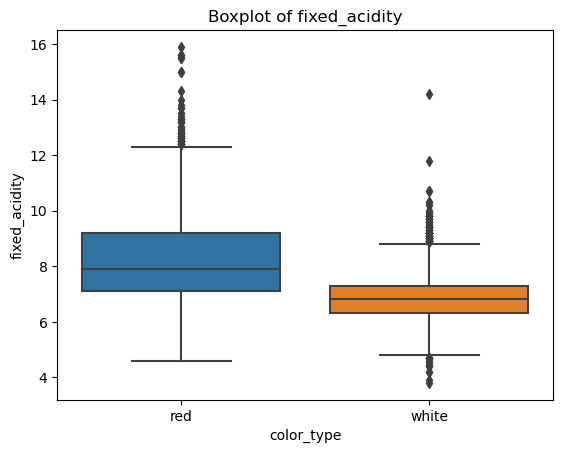

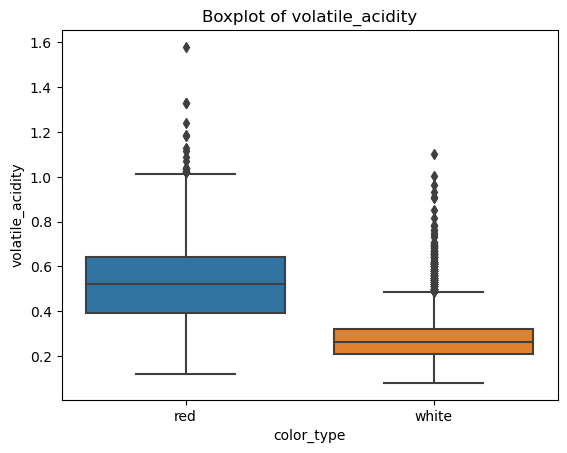

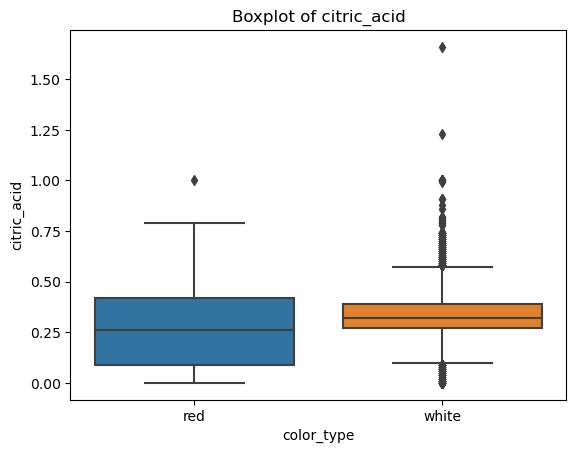

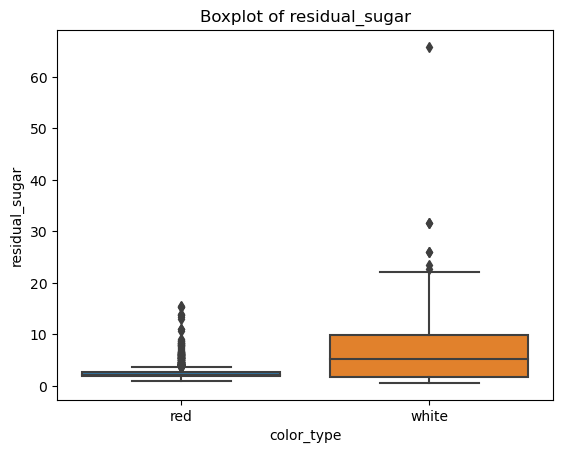

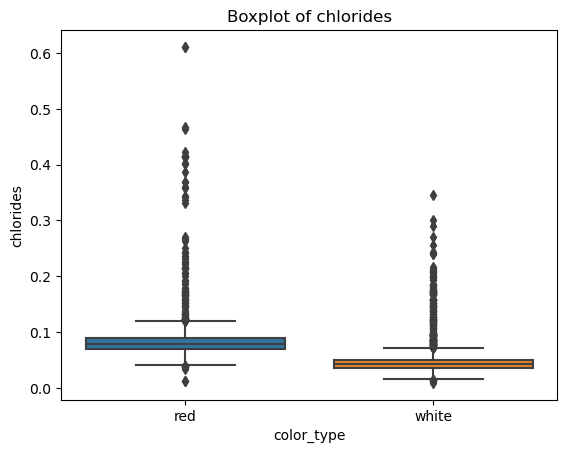

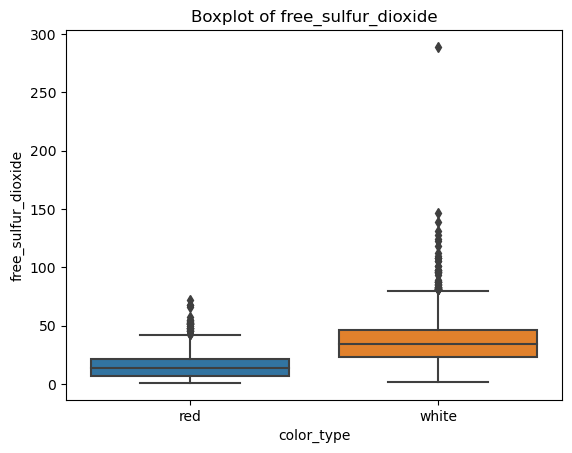

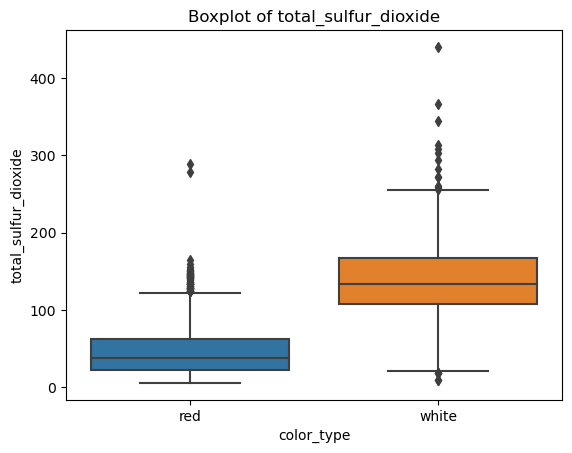

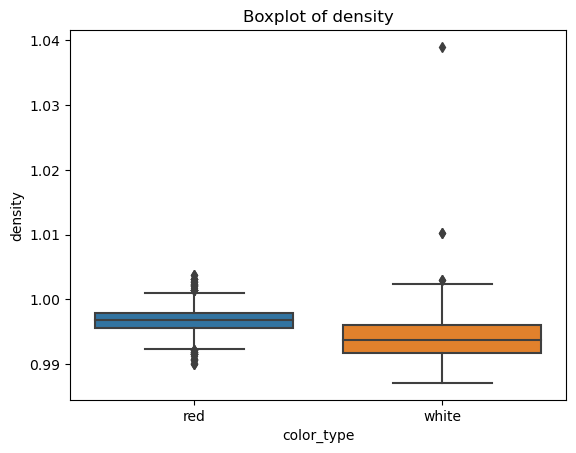

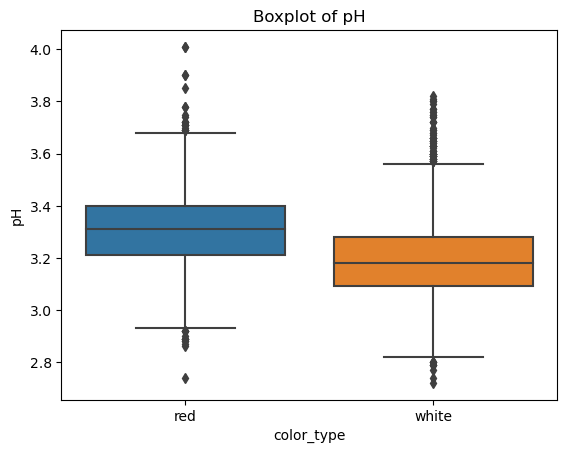

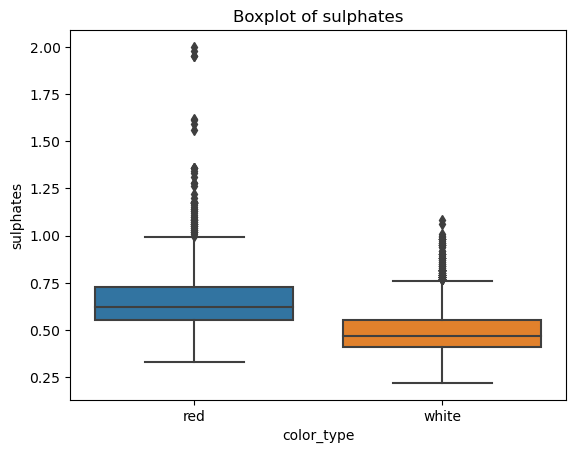

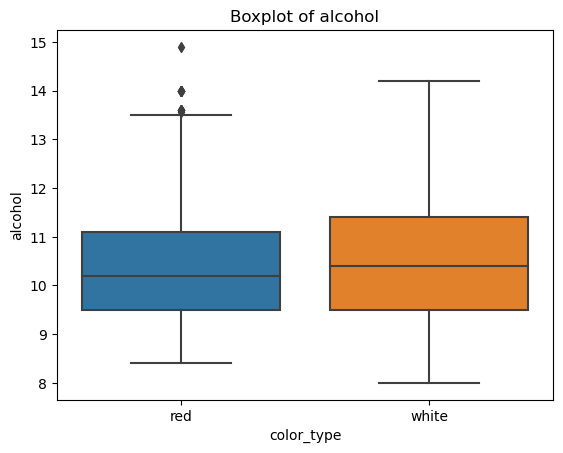

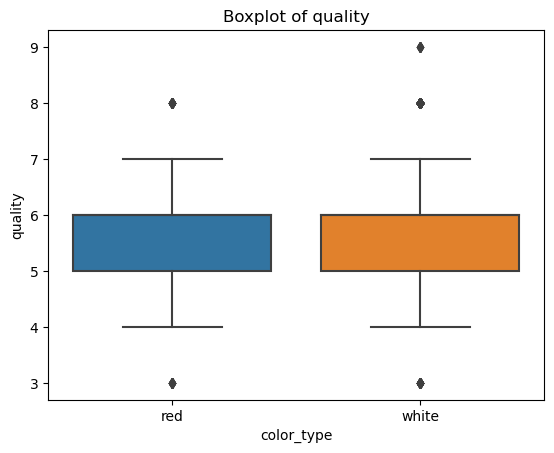

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [38]:
for col in df_merged:
    sns.boxplot(data=df_merged, x='color_type', y= col)
    plt.title(f'Boxplot of {col}')
    plt.show()

Total rows: 6497
Total columns: 13


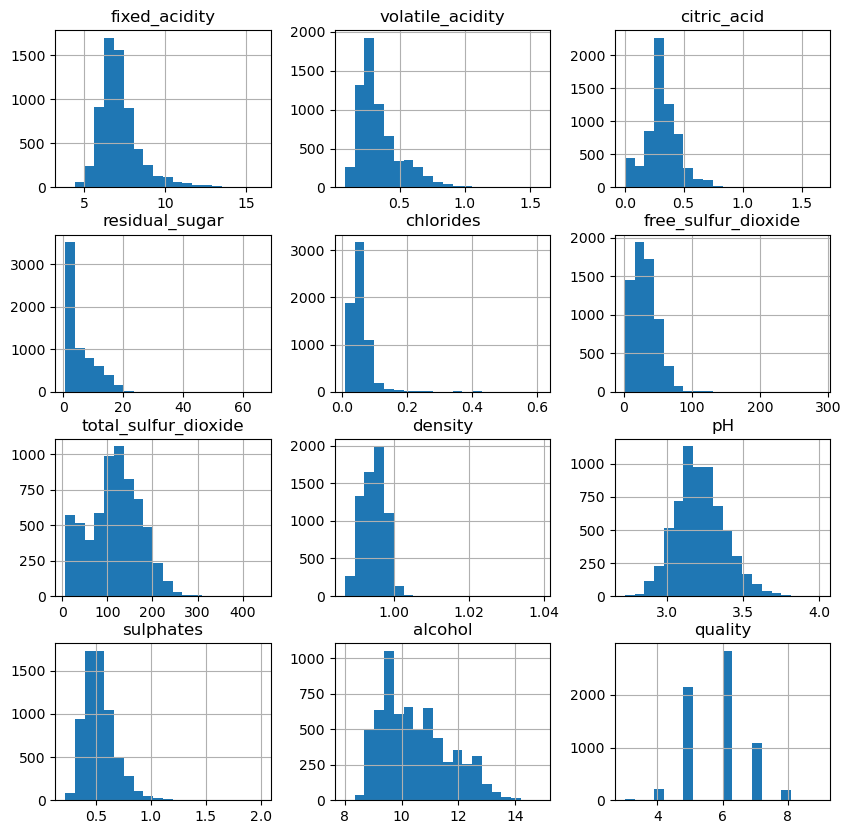

,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,106,0,0.0,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...","[3.8, 15.9, 7.215307064799138]"
1,volatile_acidity,float64,187,0,0.0,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...","[0.08, 1.58, 0.3396659996921656]"
2,citric_acid,float64,89,0,0.0,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...","[0.0, 1.66, 0.3186332153301524]"
3,residual_sugar,float64,316,0,0.0,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...","[0.6, 65.8, 5.443235339387409]"
4,chlorides,float64,214,0,0.0,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...","[0.009, 0.611, 0.05603386178236109]"
5,free_sulfur_dioxide,float64,135,0,0.0,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...","[1.0, 289.0, 30.525319378174544]"
6,total_sulfur_dioxide,float64,276,0,0.0,"[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....","[6.0, 440.0, 115.7445744189626]"
7,density,float64,998,0,0.0,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...","[0.98711, 1.03898, 0.9946966338309989]"
8,pH,float64,108,0,0.0,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...","[2.72, 4.01, 3.2185008465445586]"
9,sulphates,float64,111,0,0.0,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...","[0.22, 2.0, 0.5312682776666153]"


In [41]:
# Univariate exploration (before split)

check_columns(df_merged, graphs=True)

## Explore

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
# Split before bivariate exploring
# Switched to random state 123 to match Zac's
def split_data(df):
    '''
    split continuouse data into train, validate, test; No target variable

    argument: df

    return: train, validate, test
    '''

    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=123,
                                   )
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=123,
                                   )
    
    print(f'Train: {len(train)/len(df)}')
    print(f'Validate: {len(validate)/len(df)}')
    print(f'Test: {len(test)/len(df)}')
    

    return train, validate, test

In [46]:
train, validate, test = split_data(df_merged)

Train: 0.5597968293058334
Validate: 0.2401108203786363
Test: 0.20009235031553024


In [47]:
check_columns(train)

Total rows: 3637
Total columns: 13


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,99,0,0.0,"[5.5, 7.9, 6.9, 5.9, 10.4, 7.8, 7.2, 7.3, 6.5,...","[3.8, 15.6, 7.233296673082211]"
1,volatile_acidity,float64,163,0,0.0,"[0.24, 0.32, 0.19, 0.28, 0.44, 0.56, 0.57, 0.1...","[0.085, 1.58, 0.3401388507011273]"
2,citric_acid,float64,87,0,0.0,"[0.32, 0.51, 0.4, 0.14, 0.73, 0.12, 0.05, 0.21...","[0.0, 1.66, 0.31923013472642287]"
3,residual_sugar,float64,280,0,0.0,"[8.7, 1.8, 1.4, 8.6, 6.55, 2.0, 2.3, 0.8, 2.2,...","[0.6, 65.8, 5.521267528182568]"
4,chlorides,float64,183,0,0.0,"[0.06, 0.341, 0.036, 0.032, 0.074, 0.082, 0.08...","[0.012, 0.61, 0.05635826230409679]"
5,free_sulfur_dioxide,float64,112,0,0.0,"[19.0, 17.0, 14.0, 30.0, 38.0, 7.0, 16.0, 50.0...","[1.0, 146.5, 30.771377508935934]"
6,total_sulfur_dioxide,float64,258,0,0.0,"[102.0, 56.0, 55.0, 142.0, 76.0, 28.0, 36.0, 1...","[6.0, 366.5, 115.77014022546055]"
7,density,float64,859,0,0.0,"[0.994, 0.9969, 0.9909, 0.99542, 0.999, 0.997,...","[0.98711, 1.03898, 0.994757063513885]"
8,pH,float64,102,0,0.0,"[3.27, 3.04, 3.08, 3.28, 3.17, 3.37, 3.38, 3.3...","[2.72, 3.9, 3.217830629639813]"
9,sulphates,float64,104,0,0.0,"[0.31, 1.08, 0.68, 0.44, 0.85, 0.5, 0.6, 0.33,...","[0.22, 2.0, 0.5322271102557052]"


What does total_sulfer_dioxide and volitile acidity look like plotted?

<Axes: xlabel='total_sulfur_dioxide', ylabel='volatile_acidity'>

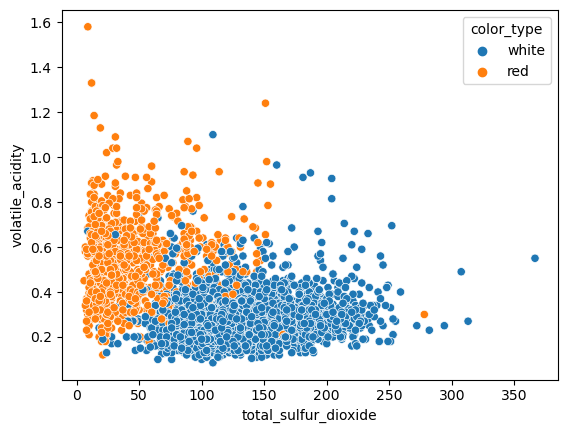

In [50]:
sns.scatterplot(train, x='total_sulfur_dioxide',y='volatile_acidity', hue= 'color_type')

What about fixed_acidity and sulphates?

<Axes: xlabel='fixed_acidity', ylabel='sulphates'>

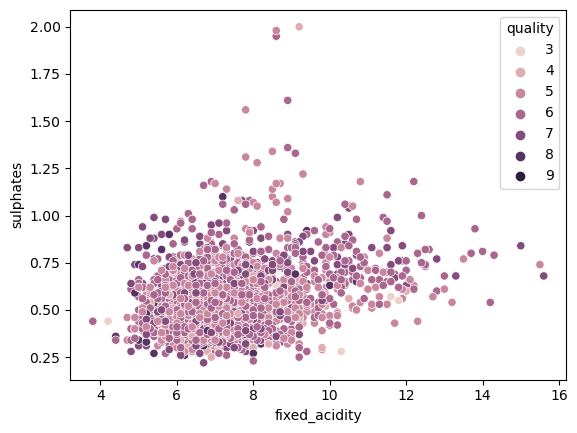

In [51]:
sns.scatterplot(train, x='fixed_acidity', y='sulphates', hue='quality')

<Axes: xlabel='fixed_acidity', ylabel='sulphates'>

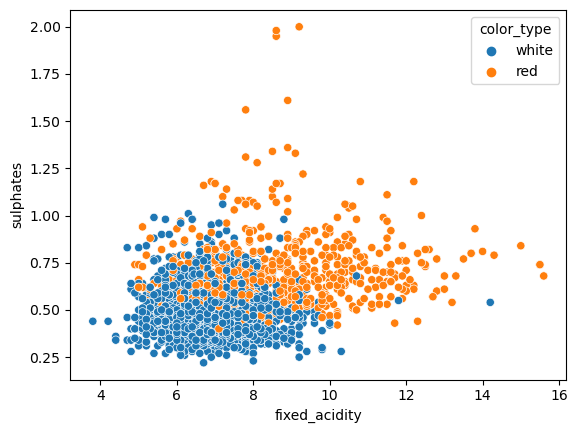

In [52]:
sns.scatterplot(train, x='fixed_acidity', y='sulphates', hue='color_type')

In [53]:
explore_cols = ['quality', 'alcohol', 'density', 'color_type']

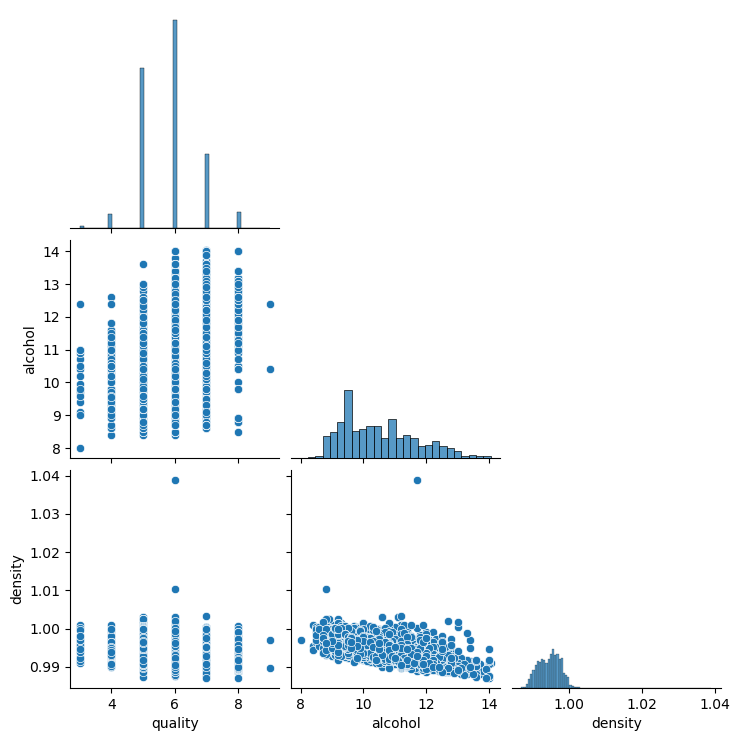

In [54]:
sns.pairplot(data=train[explore_cols], corner=True)

Does alcohol content determine the quality?

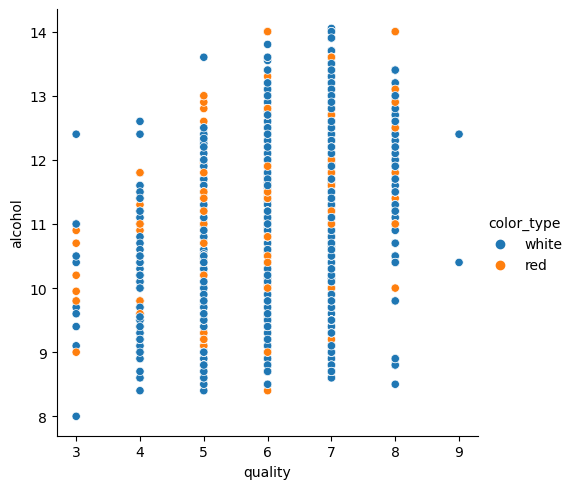

In [56]:
sns.relplot(train, x='quality', y='alcohol', hue='color_type')

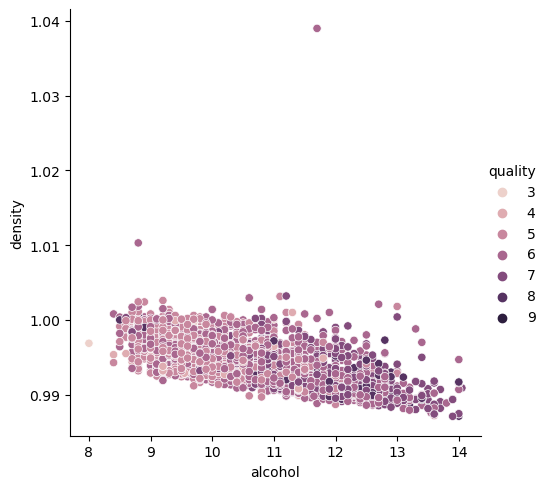

In [58]:
sns.relplot(train, x = 'alcohol', y= 'density', hue='quality')

In [62]:
import plotly.express as px

In [63]:
# Create the scatter plot with animation
fig = px.scatter(train.sort_values("quality"), x="alcohol", y="density", animation_frame="quality")

# Show the plot
fig.show()